# Apple (AAPL):

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import iex as IEX
import quandl

# from beakerx import *

from iexfinance import Stock
from iexfinance import get_historical_data
from iexfinance import get_stats_intraday

from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

%matplotlib inline

quandl.ApiConfig.api_key = "9tQnPMV9zakeCm4K6S5X"

In [123]:
! ls data

EOD-datasets-codes.csv facebook_quandle.csv   microsoft_quandle.csv
apple.csv              google_quandle.csv     moodys_quandle.csv
apple_quandle.csv      gs_quandle.csv         twitter_quandle.csv
blackrock_quandle.csv  ibm_quandle.csv
dow_quandle.csv        jpm_quandle.csv


## Importing Stock History - Apple:

**The data being imported is from the Quadle library.**

In [124]:
df = pd.read_csv('data/apple_quandle.csv')
df.head()

,Date,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,WIKI/AAPL - Adj. Close,WIKI/AAPL - Adj. Volume
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
2,1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
3,1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
4,1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


--------
## Renaming the Columns:

In [125]:
df.rename(index=str, columns={"WIKI/AAPL - Open": "Open_Apple",
                              "WIKI/AAPL - High": "High_Apple",
                              "WIKI/AAPL - Low": "Low_Apple",
                              "WIKI/AAPL - Close": "Close_Apple",
                              "WIKI/AAPL - Volume": "Volume_Apple",
                              "WIKI/AAPL - Ex-Dividend": "Ex_Dividend_Apple",
                              "WIKI/AAPL - Split Ratio": "Split_Ration_Apple",
                              "WIKI/AAPL - Adj. Open": "Adj_Open_Apple",
                              "WIKI/AAPL - Adj. High": "Adj_High_Apple",
                              "WIKI/AAPL - Adj. Low": "Adj_Low_Apple",
                              "WIKI/AAPL - Adj. Close":"Adj_Close_Apple",
                              "WIKI/AAPL - Adj. Volume":"Adj_Volume_Apple"
                             }, inplace=True)

df.head(2)

,Date,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple
0,1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1,1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0


--------

## Inspecting the Data:

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9400 entries, 0 to 9399
Data columns (total 13 columns):
Date                  9400 non-null object
Open_Apple            9400 non-null float64
High_Apple            9400 non-null float64
Low_Apple             9400 non-null float64
Close_Apple           9400 non-null float64
Volume_Apple          9400 non-null float64
Ex_Dividend_Apple     9400 non-null float64
Split_Ration_Apple    9400 non-null float64
Adj_Open_Apple        9400 non-null float64
Adj_High_Apple        9400 non-null float64
Adj_Low_Apple         9400 non-null float64
Adj_Close_Apple       9400 non-null float64
Adj_Volume_Apple      9400 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.0+ MB


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open_Apple,9400.0,1.012334e+02,1.351693e+02,11.120000,2.700000e+01,4.375000e+01,1.101200e+02,7.024100e+02
High_Apple,9400.0,1.024670e+02,1.362940e+02,11.120000,2.750000e+01,4.450000e+01,1.117550e+02,7.050700e+02
Low_Apple,9400.0,9.989625e+01,1.338295e+02,11.000000,2.650000e+01,4.300000e+01,1.087475e+02,6.995700e+02
Close_Apple,9400.0,1.011945e+02,1.350873e+02,11.000000,2.700000e+01,4.388000e+01,1.100600e+02,7.021000e+02
Volume_Apple,9400.0,1.198560e+07,1.662310e+07,4471.000000,1.232075e+06,3.776200e+06,1.808312e+07,1.895606e+08
Ex_Dividend_Apple,9400.0,3.632979e-03,8.826907e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.290000e+00
Split_Ration_Apple,9400.0,1.000957e+00,6.440855e-02,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
Adj_Open_Apple,9400.0,2.157102e+01,3.927253e+01,0.163495,9.234530e-01,1.437461e+00,2.027018e+01,1.825900e+02
Adj_High_Apple,9400.0,2.177493e+01,3.958489e+01,0.163495,9.402799e-01,1.468272e+00,2.056560e+01,1.835000e+02
Adj_Low_Apple,9400.0,2.135125e+01,3.894265e+01,0.161731,9.040956e-01,1.410762e+00,1.990585e+01,1.802100e+02


---------

## Converting the Date from an Object to Datetime:

In [128]:
df['Date'] = pd.to_datetime(df.Date, dayfirst=True);

## Setting the Date as the Index

In [129]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True, ascending=True)
df.head(2)

,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0


-------

## Inspecting for Missing Values:

**No missing values were found.**

In [9]:
df.isnull().sum()

Open_Apple            0
High_Apple            0
Low_Apple             0
Close_Apple           0
Volume_Apple          0
Ex_Dividend_Apple     0
Split_Ration_Apple    0
Adj_Open_Apple        0
Adj_High_Apple        0
Adj_Low_Apple         0
Adj_Close_Apple       0
Adj_Volume_Apple      0
dtype: int64

---------

## Adding Column with the Year:

In [10]:
df['Year'] = df.index.year
df.head(2)

,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple,Year
Date,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,1980
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,1980


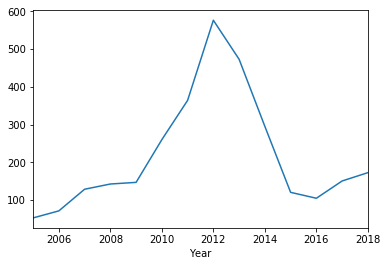

In [11]:
df[df['Year'] > 2004].groupby('Year').Open_Apple.mean().plot();

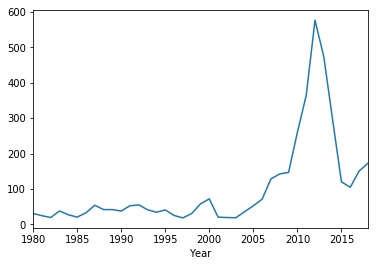

In [12]:
df.groupby('Year').Open_Apple.mean().plot();

In [13]:
df[df['Year'] > 2004].groupby('Year').mean()

,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple
Year,,,,,,,,,,,,
2005,52.353393,53.112862,51.589491,52.401591,2.250884e+07,0.000000,1.003968,5.993024,6.079131,5.906680,5.998501,1.806301e+08
2006,71.002401,71.951990,69.810456,70.811727,3.069137e+07,0.000000,1.000000,9.124798,9.246834,8.971617,9.100294,2.148396e+08
2007,128.389975,130.097569,126.184506,128.274469,3.514456e+07,0.000000,1.000000,16.499901,16.719351,16.216468,16.485057,2.460119e+08
2008,142.289090,145.128989,138.857707,141.979021,4.037002e+07,0.000000,1.000000,18.286131,18.651098,17.845151,18.246283,2.825901e+08
2009,146.627369,148.495693,144.956550,146.815438,2.030239e+07,0.000000,1.000000,18.843661,19.083766,18.628937,18.867830,1.421168e+08
2010,259.947268,262.368804,256.847620,259.842392,2.140376e+07,0.000000,1.000000,33.406847,33.718048,33.008499,33.393369,1.498263e+08
2011,364.069473,367.423597,360.297742,364.004304,1.758211e+07,0.000000,1.000000,46.788002,47.219053,46.303282,46.779626,1.230747e+08
2012,576.651677,581.825425,569.883308,576.049753,1.885203e+07,0.021200,1.000000,74.289017,74.955635,73.416642,74.211195,1.319642e+08
2013,473.127997,477.638840,468.247116,472.634823,1.451553e+07,0.046825,1.000000,62.180333,62.772685,61.539893,62.115957,1.016087e+08


In [103]:
df.ewm(span=10).mean().head()

,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple,Year
Date,,,,,,,,,,,,,
1980-12-12,28.750000,28.870000,28.750000,28.750000,2.093900e+06,0.0,1.0,0.422706,0.424470,0.422706,0.422706,1.172584e+08,1980.0
1980-12-15,27.996500,28.050500,27.925000,27.925000,1.374115e+06,0.0,1.0,0.411627,0.412421,0.410576,0.410576,7.695044e+07,1980.0
1980-12-16,26.940664,26.972957,26.849668,26.849668,1.011471e+06,0.0,1.0,0.396104,0.396578,0.394766,0.394766,5.664236e+07,1980.0
1980-12-17,26.587928,26.652411,26.526911,26.526911,8.053731e+05,0.0,1.0,0.390917,0.391865,0.390020,0.390020,4.510089e+07,1980.0
1980-12-18,26.600006,26.680426,26.556505,26.556505,6.683035e+05,0.0,1.0,0.391095,0.392277,0.390455,0.390455,3.742500e+07,1980.0


In [105]:
df.pct_change().head() ##

,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple,Year
Date,,,,,,,,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,-0.047652,-0.051611,-0.052174,-0.052174,-0.625006,NaN,0.0,-0.047652,-0.051611,-0.052174,-0.052174,-0.625006,0.0
1980-12-16,-0.073411,-0.073411,-0.073394,-0.073394,-0.398879,NaN,0.0,-0.073411,-0.073411,-0.073394,-0.073394,-0.398879,0.0
1980-12-17,0.019708,0.024832,0.024554,0.024554,-0.182415,NaN,0.0,0.019708,0.024832,0.024554,0.024554,-0.182415,0.0
1980-12-18,0.029378,0.028846,0.029378,0.029378,-0.150298,NaN,0.0,0.029378,0.028846,0.029378,0.029378,-0.150298,0.0


In [95]:
df.resample('A').mean()

,Open_Apple,High_Apple,Low_Apple,Close_Apple,Volume_Apple,Ex_Dividend_Apple,Split_Ration_Apple,Adj_Open_Apple,Adj_High_Apple,Adj_Low_Apple,Adj_Close_Apple,Adj_Volume_Apple,Year
Date,,,,,,,,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,4.618308e+05,0.000000,1.000000,0.448164,0.449431,0.447599,0.447599,2.586252e+07,1980
1981-12-31,24.386349,24.471865,24.311151,24.311151,1.452123e+05,0.000000,1.000000,0.358548,0.359805,0.357442,0.357442,8.131889e+06,1981
1982-12-31,19.139723,19.412688,18.957036,19.142727,3.769941e+05,0.000000,1.000000,0.281408,0.285421,0.278722,0.281452,2.111167e+07,1982
1983-12-31,37.524841,38.376071,36.669841,37.521984,7.383905e+05,0.000000,1.000000,0.551721,0.564236,0.539150,0.551679,4.134987e+07,1983
1984-12-31,26.869170,27.392964,26.350751,26.801028,7.407368e+05,0.000000,1.000000,0.395052,0.402754,0.387430,0.394051,4.148126e+07,1984
1985-12-31,20.377431,20.593281,20.127510,20.193676,8.027469e+05,0.000000,1.000000,0.299606,0.302779,0.295931,0.296904,4.495383e+07,1985
1986-12-31,32.387984,32.939684,31.854664,32.461028,9.409095e+05,0.000000,1.000000,0.476195,0.484306,0.468353,0.477268,5.269093e+07,1986
1987-12-31,53.822846,55.036798,52.695178,53.889684,1.518645e+06,0.000316,1.003953,1.145819,1.172140,1.119478,1.145607,5.889323e+07,1987
1988-12-31,41.556047,42.186759,40.890751,41.540079,1.457262e+06,0.001344,1.000000,1.229613,1.248273,1.209939,1.229146,4.080334e+07,1988


In [14]:
# def plot_year(x, y):
#     filter = df[df['Year'] >= 2004].groupby('Year').mean()
#     plt.figure(figsize=(14,7))
#     x.plot(lw=2.5)
#     y.plot(lw=2.5)
#     plt.xlabel('Date', fontsize=14)
#     plt.ylabel('Price ($)', fontsize=14)
#     plt.legend()

In [15]:
# plot_year(df.Open_Apple)

-------

# Feature Engineering - Market Capitalization:

Market Price = Shares Outstanding * Stock Price

https://tradingeconomics.com/aapl:us:common-shares-outstanding

In [93]:
years = df.Year.unique()
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
def shares(ticker):
    years = df.Year.unique()
    for year in year:
        # find yearly number of shares outstanding for Tesla





# 
# 
# 
# 
# 
# apple_shares = 

In [ ]:
# # Take Dates from index and move to Date column 
# tesla.reset_index(level=0, inplace = True)
# tesla['cap'] = 0

In [ ]:
# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.ix[i, 'cap'] = shares * tesla.ix[i, 'Adj. Close']

In [ ]:
# Calculate market cap for all years
for i, year in enumerate(df['Year']):
    # Retrieve the shares for the year
    shares = apple_shares.get(year)
    
    # Update the cap column to shares times the price
    df.ix[i, 'cap'] = shares * df.ix[i, 'Adj_Close']

In [ ]:
def market_cap(formulate):
    

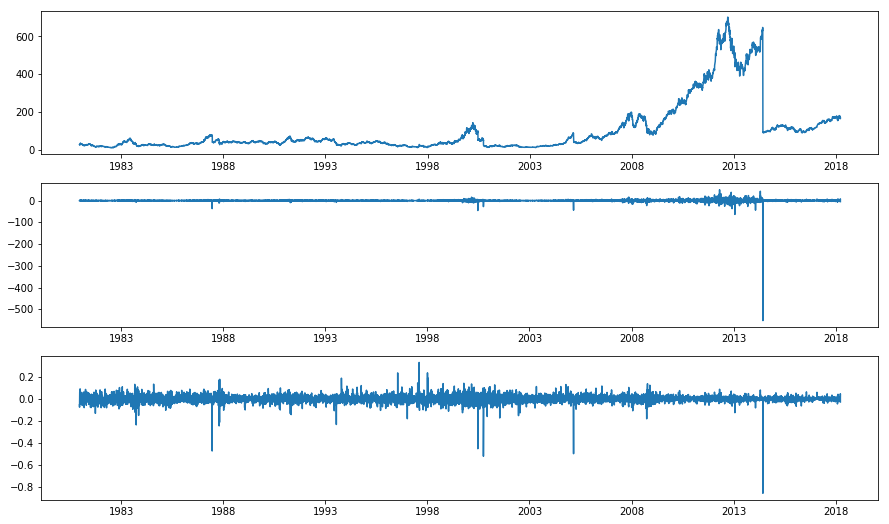

In [107]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 9))
axes[0].plot(df['Close_Apple'])
axes[1].plot(df['Close_Apple'].diff())
axes[2].plot(df['Close_Apple'].pct_change())

-------------- 
# Visualization:

------
### Creating a Function:

In [16]:
def plot_pair(column_1, column_2):
    plt.figure(figsize=(14,7))
    column_1.plot(lw=2.5)
    column_2.plot(lw=2.5)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)
    plt.legend()

------
## Open & Close for Apple:

Try plotting quarterly:

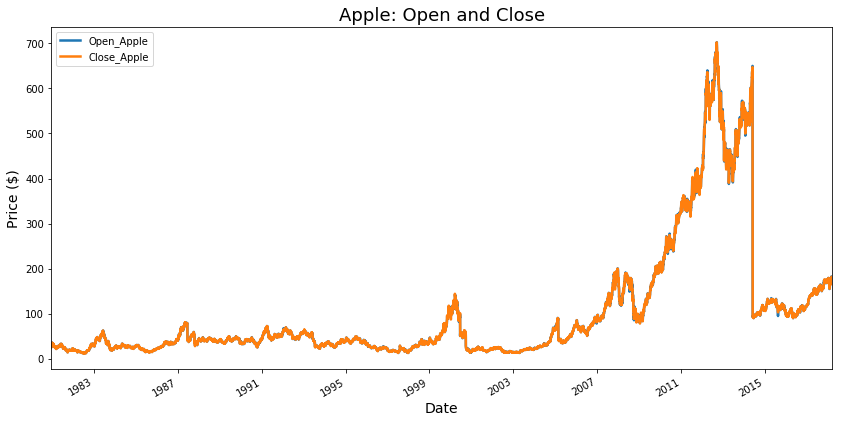

In [17]:
plot_pair(df.Open_Apple, df.Close_Apple)
plt.title('Apple: Open and Close', fontsize=18);

## Adjusted Open & Close for Apple:

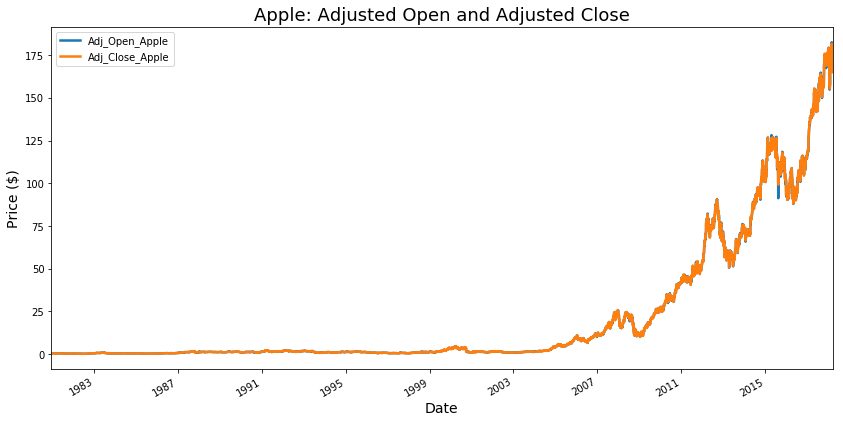

In [18]:
plot_pair(df.Adj_Open_Apple, df.Adj_Close_Apple)
plt.title('Apple: Adjusted Open and Adjusted Close', fontsize=18);

## High & Low Apple:

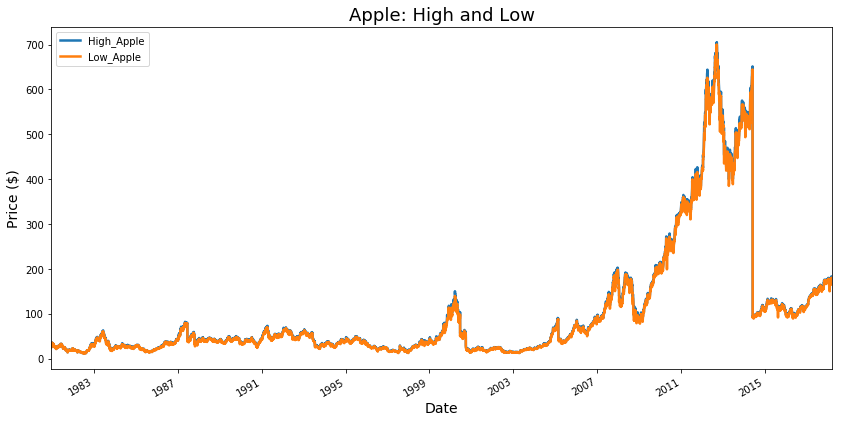

In [19]:
plot_pair(df.High_Apple, df.Low_Apple)
plt.title('Apple: High and Low', fontsize=18);

## Adjusted High & Low

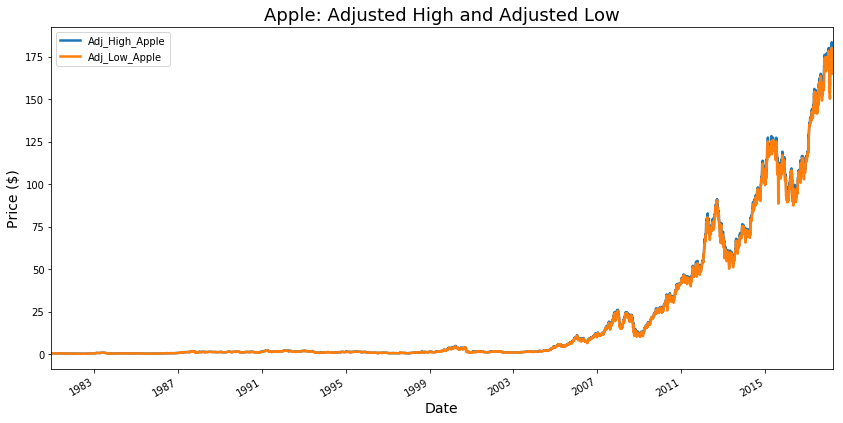

In [20]:
plot_pair(df.Adj_High_Apple, df.Adj_Low_Apple)
plt.title('Apple: Adjusted High and Adjusted Low', fontsize=18);

--------

# Plotting Individually (Not Adjusted):

## Creating a Function to Plot:

In [21]:
def plot(column):
    plt.figure(figsize=(14,7))
    column.plot(lw=2.5)
    plt.ylabel('Price ($)', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend()

## Opening Prices for Apple:

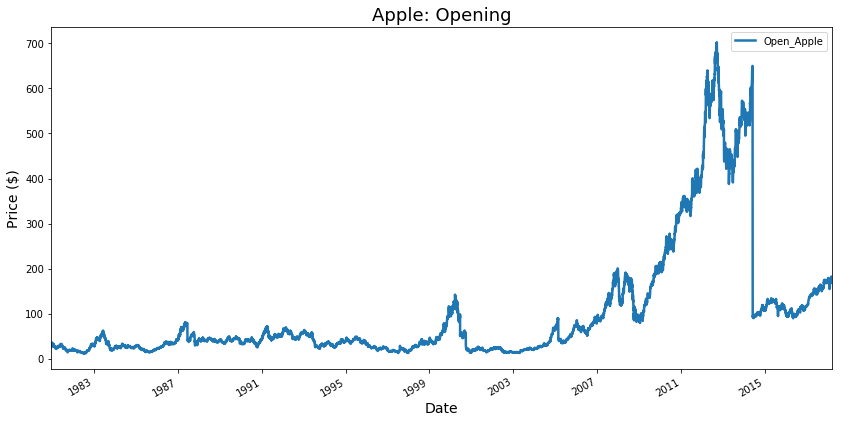

In [22]:
plot(df.Open_Apple)
plt.title('Apple: Opening', fontsize=18);

## Plotting High Prices for Apple:

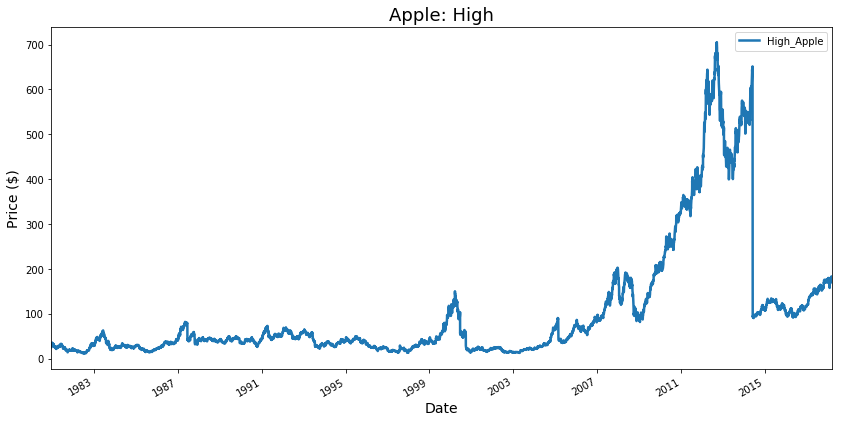

In [23]:
plot(df.High_Apple)
plt.title('Apple: High', fontsize=18);

## Plotting Low Prices for Apple:

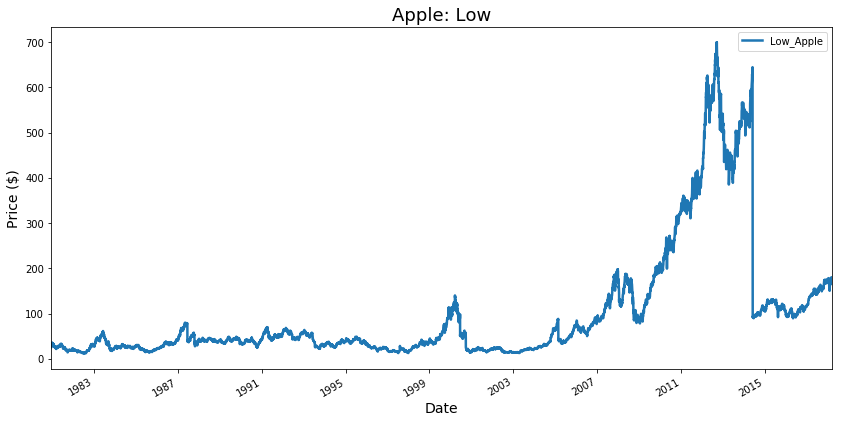

In [24]:
plot(df.Low_Apple)
plt.title('Apple: Low', fontsize=18);

## Plotting Closing Prices for Apple:

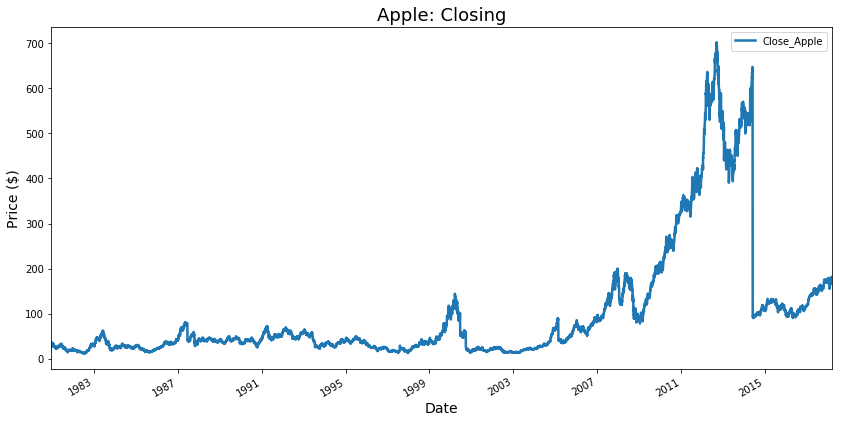

In [25]:
plot(df.Close_Apple)
plt.title('Apple: Closing', fontsize=18);

## Plotting Volume Traded for Apple:

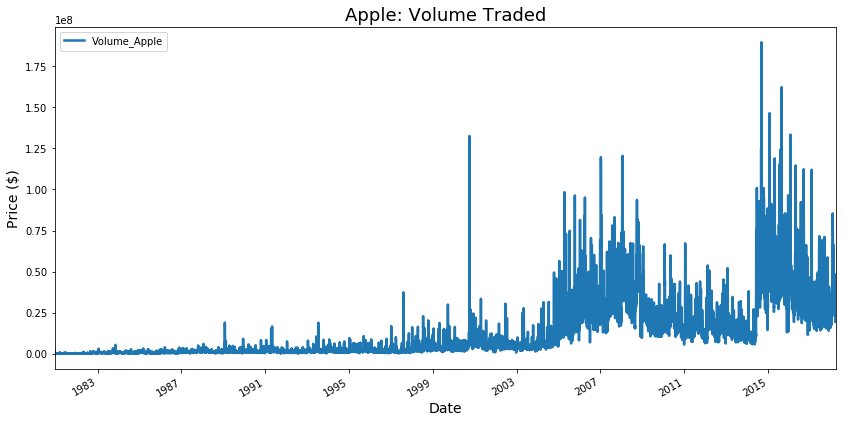

In [26]:
plot(df.Volume_Apple)
plt.title('Apple: Volume Traded', fontsize=18);

-------

# Plotting Adjusted Individually:

## Plotting Adjusted Opening Price for Apple:

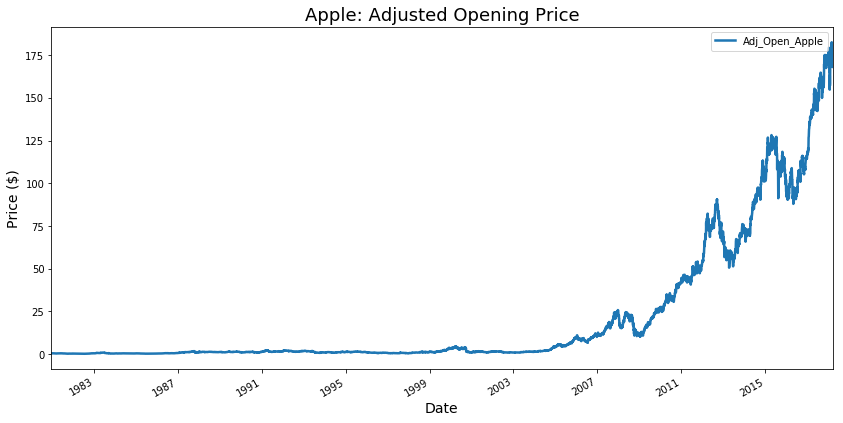

In [27]:
plot(df.Adj_Open_Apple)
plt.title('Apple: Adjusted Opening Price', fontsize=18);

## Plotting Adjusted High Price for Apple:

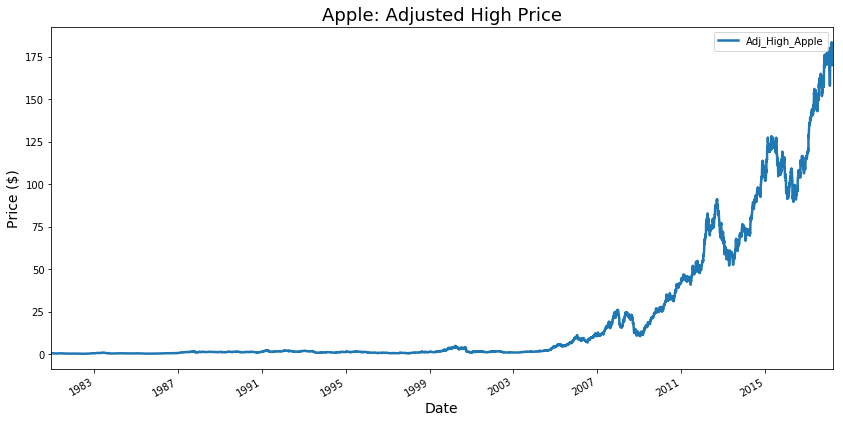

In [28]:
plot(df.Adj_High_Apple)
plt.title('Apple: Adjusted High Price', fontsize=18);

## Plotting Adjusted Low Price for Apple:


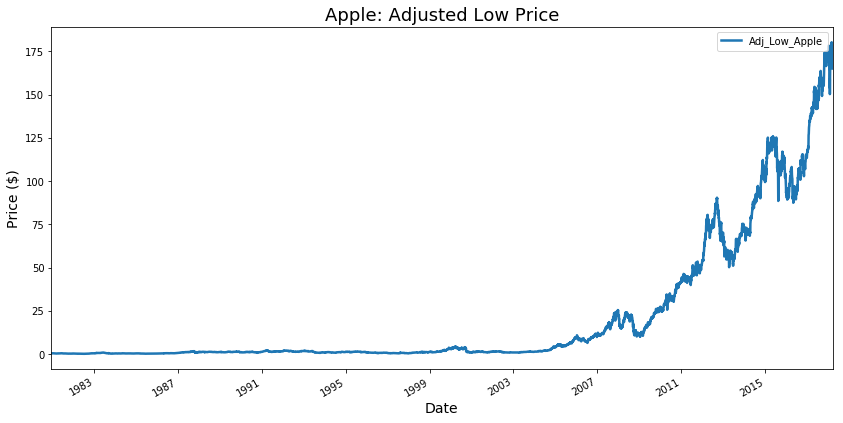

In [29]:
plot(df.Adj_Low_Apple)
plt.title('Apple: Adjusted Low Price', fontsize=18);

## Plotting Adjusted Close Price for Apple:

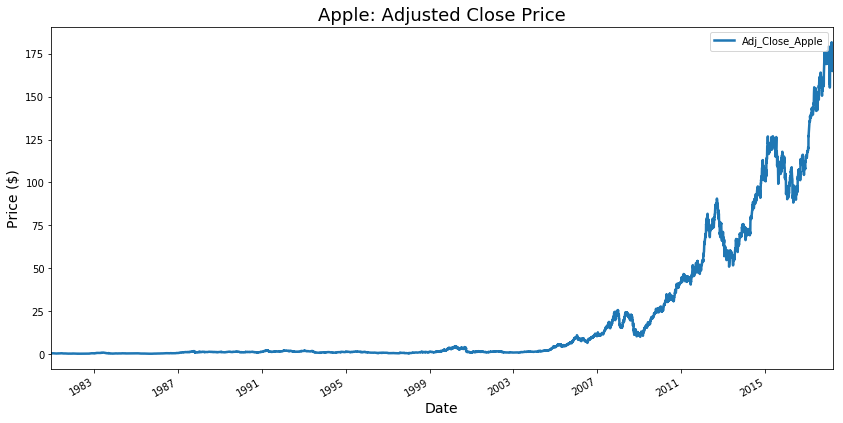

In [30]:
plot(df.Adj_Close_Apple)
plt.title('Apple: Adjusted Close Price', fontsize=18);

## Plotting Adjusted Volume Traded for Apple:

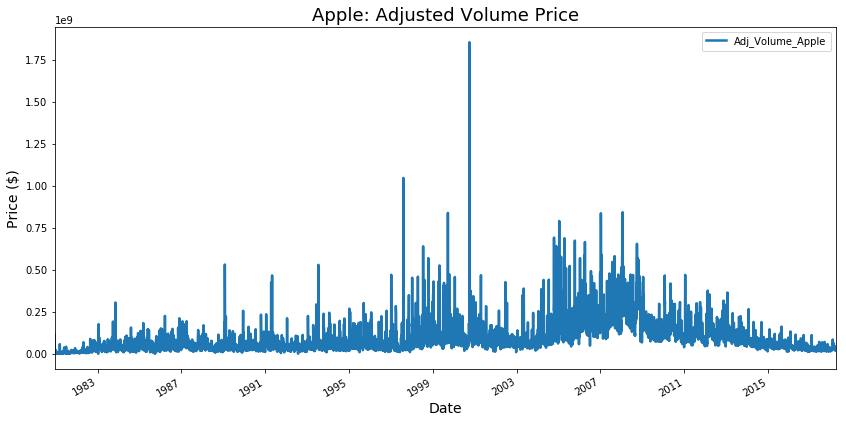

In [31]:
plot(df.Adj_Volume_Apple)
plt.title('Apple: Adjusted Volume Price', fontsize=18);

------

-------

## Saving to a CSV File:

In [48]:
df.to_csv('data/apple.csv')

-------

# Querying IEX for Apple's Stock:

In [33]:
apple = Stock('AAPL')

------
## Printing Apple's Current (as of 6/22/2018 )

In [34]:
print('Current Price:', apple.get_price())
print('06/22/2018 Opening Price:', apple.get_open())
print('06/22/2018 Closing Price:', apple.get_close())

Current Price: 184.92
06/22/2018 Opening Price: 185.94
06/22/2018 Closing Price: 184.92


-------
## Historical Stock Data from IEX:

The data here is from the past five years:

In [35]:
start = datetime(2013, 1, 1) ## 5 year limit:
end = datetime(2018, 6, 15) ## Today's Date

apple_df = get_historical_data("AAPL", start=start, end=end, output_format='pandas')
apple_df.head(4)

,open,high,low,close,volume
date,,,,,
2013-06-24,53.1258,53.2901,51.9065,52.4920,120104964
2013-06-25,52.9041,53.1766,52.0082,52.5037,78534687
2013-06-26,52.6694,52.7854,51.5948,51.9091,91924994
2013-06-27,52.0630,52.3420,51.3184,51.3497,84297955


## Inspecting the Data from IEX:

In [36]:
apple_df.describe()

,open,high,low,close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,113.014322,113.944506,112.085347,113.041559,4.836730e+07
std,33.792993,34.003746,33.576728,33.803047,2.844043e+07
min,51.034100,52.196000,50.709400,51.349700,1.147592e+07
25%,91.080200,92.154850,90.075850,91.216450,2.797615e+07
50%,107.522400,108.756900,106.614300,107.901000,4.147158e+07
75%,137.486350,138.388550,137.040200,137.829550,6.080514e+07
max,194.140000,194.200000,192.360000,193.980000,2.668336e+08


In [37]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 2013-06-24 to 2018-06-15
Data columns (total 5 columns):
open      1255 non-null float64
high      1255 non-null float64
low       1255 non-null float64
close     1255 non-null float64
volume    1255 non-null int64
dtypes: float64(4), int64(1)
memory usage: 58.8+ KB


------
## Inspecting for Missing Values - IEX:

In [38]:
apple_df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

--------

# Plotting the IEX Data:



------
# Apple's Financial Statement:

Financial Statement's for the last 4 Quarters:

In [39]:
iex = IEX.Stock()
financial = iex.get_financials('AAPL')
financial

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
0,17568000000,15130000000,37715000000,130053000000,45059000000,20478000000,23422000000,13822000000,7528000000,None,15894000000,61137000000,2018-03-31,3378000000,126878000000,367502000000,87940000000,121840000000,None,61137000000
1,7202000000,28293000000,54381000000,143810000000,27491000000,18478000000,33912000000,20065000000,7638000000,None,26274000000,88293000000,2017-12-31,3407000000,140199000000,406794000000,77153000000,122400000000,None,88293000000
2,1718000000,15656000000,32648000000,128645000000,20289000000,18473000000,19931000000,10714000000,6811000000,None,13120000000,52579000000,2017-09-30,2997000000,134047000000,375319000000,74181000000,115680000000,None,52579000000
3,3414000000,8138000000,27920000000,112875000000,18571000000,18475000000,17488000000,8717000000,6720000000,None,10768000000,45408000000,2017-06-30,2937000000,132425000000,345173000000,76759000000,108339000000,None,45408000000


## Changing the Index to Start from 1:

In [40]:
financial.index += 1
financial

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
1,17568000000,15130000000,37715000000,130053000000,45059000000,20478000000,23422000000,13822000000,7528000000,None,15894000000,61137000000,2018-03-31,3378000000,126878000000,367502000000,87940000000,121840000000,None,61137000000
2,7202000000,28293000000,54381000000,143810000000,27491000000,18478000000,33912000000,20065000000,7638000000,None,26274000000,88293000000,2017-12-31,3407000000,140199000000,406794000000,77153000000,122400000000,None,88293000000
3,1718000000,15656000000,32648000000,128645000000,20289000000,18473000000,19931000000,10714000000,6811000000,None,13120000000,52579000000,2017-09-30,2997000000,134047000000,375319000000,74181000000,115680000000,None,52579000000
4,3414000000,8138000000,27920000000,112875000000,18571000000,18475000000,17488000000,8717000000,6720000000,None,10768000000,45408000000,2017-06-30,2937000000,132425000000,345173000000,76759000000,108339000000,None,45408000000


## Inspecting the Financial Statement:

In [41]:
financial.T

,1,2,3,4
cashChange,17568000000,7202000000,1718000000,3414000000
cashFlow,15130000000,28293000000,15656000000,8138000000
costOfRevenue,37715000000,54381000000,32648000000,27920000000
currentAssets,130053000000,143810000000,128645000000,112875000000
currentCash,45059000000,27491000000,20289000000,18571000000
currentDebt,20478000000,18478000000,18473000000,18475000000
grossProfit,23422000000,33912000000,19931000000,17488000000
netIncome,13822000000,20065000000,10714000000,8717000000
operatingExpense,7528000000,7638000000,6811000000,6720000000
operatingGainsLosses,None,None,None,None


## Inspecting Missing Values in the Financial Statement:

In [42]:
financial.isnull().sum()

cashChange                0
cashFlow                  0
costOfRevenue             0
currentAssets             0
currentCash               0
currentDebt               0
grossProfit               0
netIncome                 0
operatingExpense          0
operatingGainsLosses      4
operatingIncome           0
operatingRevenue          0
reportDate                0
researchAndDevelopment    0
shareholderEquity         0
totalAssets               0
totalCash                 0
totalDebt                 0
totalLiabilities          4
totalRevenue              0
dtype: int64

## Earnings:

https://www.wallstreetmojo.com/revenue-vs-earnings/

In [43]:
earnings = iex.get_earnings('AAPL')
earnings.T

,0,1,2,3
EPSReportDate,2018-05-01,2018-02-01,2017-11-02,2017-08-01
EPSSurpriseDollar,0.04,0.07,0.2,0.1
actualEPS,2.73,3.89,2.07,1.67
announceTime,AMC,AMC,AMC,AMC
consensusEPS,2.69,3.82,1.87,1.57
estimatedChangePercent,0.280952,0.136905,0.11976,0.105634
estimatedEPS,2.69,3.82,1.87,1.57
fiscalEndDate,2018-03-31,2017-12-31,2017-09-30,2017-06-30
fiscalPeriod,Q2 2018,Q1 2018,Q4 2017,Q3 2017
numberOfEstimates,10,9,10,13


## Chart:

In [44]:
iex.get_chart('AAPL', chart_range='5y')

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-1.429200,0.000000,-2.651,52.4920,2013-06-24,53.2901,"Jun 24, 13",51.9065,53.1258,17157852,120104964,52.4641
1,0.011739,0.000223,0.022,52.5037,2013-06-25,53.1766,"Jun 25, 13",52.0082,52.9041,11219241,78534687,52.4397
2,-0.594635,-0.011105,-1.133,51.9091,2013-06-26,52.7854,"Jun 26, 13",51.5948,52.6694,13132142,91924994,51.9897
3,-0.559426,-0.021761,-1.078,51.3497,2013-06-27,52.3420,"Jun 27, 13",51.3184,52.0630,12042565,84297955,51.7006
4,0.358604,-0.014930,0.698,51.7083,2013-06-28,52.1960,"Jun 28, 13",50.7094,51.0341,20659962,144619734,51.5168
5,1.654800,0.016595,3.200,53.3631,2013-07-01,53.7608,"Jul 1, 13",52.3199,52.5116,13963344,97743408,53.2289
6,1.208800,0.039623,2.265,54.5719,2013-07-02,54.9814,"Jul 2, 13",53.3957,53.4596,16777450,117442150,54.3895
7,0.301228,0.045361,0.552,54.8731,2013-07-03,55.1574,"Jul 3, 13",54.4363,54.8810,8604594,60232158,54.8039
8,-0.440761,0.036966,-0.803,54.4324,2013-07-05,55.1978,"Jul 5, 13",54.1625,54.8197,9786542,68505794,54.5140
9,-0.309051,0.031077,-0.568,54.1233,2013-07-08,54.8992,"Jul 8, 13",53.5496,54.7832,10645914,74521398,54.0322


## Getting a Quote:

In [45]:
print(iex.get_delayed_quote('AAPL'))
iex.get_quote('AAPL')

{'symbol': 'AAPL', 'delayedPrice': 184.92, 'high': 186.15, 'low': 184.7, 'delayedSize': 6533230, 'delayedPriceTime': 1529697600451, 'processedTime': 1529698501932}


{'symbol': 'AAPL',
 'companyName': 'Apple Inc.',
 'primaryExchange': 'Nasdaq Global Select',
 'sector': 'Technology',
 'calculationPrice': 'close',
 'open': 185.94,
 'openTime': 1529674200375,
 'close': 184.92,
 'closeTime': 1529697600451,
 'high': 186.15,
 'low': 184.7,
 'latestPrice': 184.92,
 'latestSource': 'Close',
 'latestTime': 'June 22, 2018',
 'latestUpdate': 1529697600451,
 'latestVolume': 27247730,
 'iexRealtimePrice': None,
 'iexRealtimeSize': None,
 'iexLastUpdated': None,
 'delayedPrice': 184.92,
 'delayedPriceTime': 1529697600451,
 'extendedPrice': 185.01,
 'extendedChange': 0.09,
 'extendedChangePercent': 0.00049,
 'extendedPriceTime': 1529701087475,
 'previousClose': 185.46,
 'change': -0.54,
 'changePercent': -0.00291,
 'iexMarketPercent': None,
 'iexVolume': None,
 'avgTotalVolume': 23151569,
 'iexBidPrice': None,
 'iexBidSize': None,
 'iexAskPrice': None,
 'iexAskSize': None,
 'marketCap': 908907318960,
 'peRatio': 19.01,
 'week52High': 194.2,
 'week52Low': 142.28,


In [46]:
iex.get_effective_spread('AAPL')

,effectiveQuoted,effectiveSpread,priceImprovement,venue,venueName,volume
0,0.659144,0.030178,0.005913,XCHI,CHX,4994
1,0.877788,0.017246,0.001222,XCIS,NYSE National,4394
2,0.968436,0.012275,0.000325,ARCX,NYSE Arca,27380548
3,0.933037,0.012154,0.000674,XBOS,Nasdaq BX,10422818
4,0.878757,0.011565,0.001153,BATY,Cboe BYX,5323800
5,0.901793,0.011415,0.001075,XPHL,Nasdaq PSX,3697931
6,0.837774,0.011173,0.001769,XNGS,Nasdaq,82930522
7,0.850541,0.010997,0.001605,BATS,Cboe BZX,31635167
8,0.902766,0.010873,0.001020,EDGA,Cboe EDGA,4804724
9,0.871124,0.010782,0.001379,EDGX,Cboe EDGX,31235709


## Stats:

In [47]:
iex.get_stats('AAPL').T

,0
EBITDA,61840000000
EPSSurpriseDollar,None
EPSSurprisePercent,1.8325
beta,1.21411
cash,228093000000
companyName,Apple Inc.
consensusEPS,3.82
day200MovingAvg,170.821
day30ChangePercent,-0.0194602
day50MovingAvg,182.738
